<center><h3>Name: Soumya Basu</h3></center>
<center><h3>Reg No.:23MDT0047</h3></center>
<center><h3>LAB_DA_3</h3></center>

# Problem1.  Perform the multivariate regression analysis for the following data.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
dash = '--'.join('' for i in range(60))

##### Data

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


##### Correlation_matrix

In [5]:
# Compute the correlation matrix and fill NaN values
correlation_matrix = df.corr()
# Display the correlation matrix
correlation_matrix 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

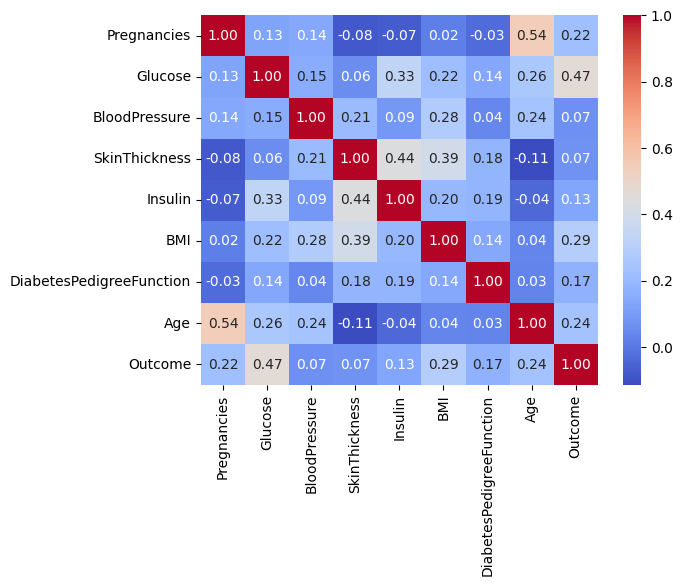

In [6]:
sns.heatmap(correlation_matrix, fmt='.2f', annot=True, cmap='coolwarm')

<center><h3>Linear Regression Model</h3></center>

In [13]:
# Independent variables (features)
X = df.drop(columns=["Outcome"])
# Dependent variable (target)
y = df["Outcome"]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)


In [14]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Intercept:", model.intercept_)
print(dash)
print("Coefficients:", model.coef_)
print(dash)
print("Mean Squared Error (MSE):", mse)
print(dash)
print("R-squared (R2):", r2)
print(dash)

# Optionally, display the predicted vs actual values for further analysis
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

Intercept: -0.9487546338208497
----------------------------------------------------------------------------------------------------------------------
Coefficients: [ 0.01046818  0.00563353 -0.00228103  0.00053209 -0.00027815  0.01503864
  0.11126264  0.00646027]
----------------------------------------------------------------------------------------------------------------------
Mean Squared Error (MSE): 0.17104527280850096
----------------------------------------------------------------------------------------------------------------------
R-squared (R2): 0.2550028117674178
----------------------------------------------------------------------------------------------------------------------
     Actual  Predicted
668       0   0.335500
324       0   0.238099
624       0   0.151052
690       0   0.240136
473       0   0.481424
..      ...        ...
355       1   0.681590
534       0   0.163167
344       0   0.481562
296       1   0.301017
462       0   0.261109

[154 rows x 2 columns]

### Conclusion

The model has a moderate R-squared value, explaining about 25.5% of the variance in the target variable, with an MSE of 0.171.

The coefficients show how each feature impacts the prediction, with the seventh feature having the strongest influence.

There is room for improvement in the model, as the predictions are not consistently close to the actual values, especially in some cases where the prediction error is noticeable.

<center><h3>Ridge Regression Model</h3></center>

In [15]:
# Ridge regression
ridge = Ridge(alpha=1.0)  # Regularization strength (alpha)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

In [16]:
# Compute Metrics for Ridge
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

In [17]:
# Print metrics for Ridge
print("Ridge Regression Metrics:")
print(dash)
print(f"Mean Squared Error (MSE): {ridge_mse:.2f}")
print(dash)
print(f"R-squared (R²): {ridge_r2:.2f}")

Ridge Regression Metrics:
----------------------------------------------------------------------------------------------------------------------
Mean Squared Error (MSE): 0.17
----------------------------------------------------------------------------------------------------------------------
R-squared (R²): 0.25


### Conclusion
The model has a moderate R-squared value, explaining about 25% of the variance in the target variable, with an MSE of 0.17.

For more combinations you can check this note book <a href= https://github.com/s0ul141/Multivariate_Data_Analysis/blob/main/Multivariate_Regression_Analysis.ipynb >Multivariate Regression</a>

# Problem 2: Choose your own consisting 7 variables having size 70 each and reduse it into 3 principle components by applying Principle Component Analysis.

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [16]:
df = pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
print(df.shape)
print(dash)
df= df.iloc[:70, : ]
print(df.shape)

(698, 9)
----------------------------------------------------------------------------------------------------------------------
(70, 9)


In [27]:
# Selected 7 variables for PCA
selected_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']
df_selected = df[selected_columns]

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

In [28]:
# Apply PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Display the explained variance ratios
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.28428117 0.1814054  0.14274381]


### Key Insights:
- **Total explained variance** by the first three principal components is:
  \[
  28.42\% + 18.14\% + 14.27\% = 60.83\%
  \]
  - So, the first three components together explain **60.83%** of the total variance in the dataset.
  
- PCA is often used for **dimensionality reduction**, and with these three components, you could potentially reduce the dimensionality of the data (i.e., reduce the number of features) while retaining much of the variance or information in the original data.
  
- Since **60.83%** of the variance is captured by these three components, they provide a simplified representation of the dataset with fewer features but with a significant amount of the original structure and relationships preserved.

If a higher percentage of variance retention is needed (e.g., 80-90%), you might consider including additional principal components.

In [30]:
# Output the transformed data
print(pca_df.head())

        PC1       PC2       PC3
0 -0.070357  0.904992 -0.968756
1 -1.097158 -0.588191 -0.457902
2 -1.122797  2.107590  2.456553
3 -1.705489 -0.313304 -0.076621
4  0.689695 -0.354270  0.372119


### Conclusion
### Breakdown of each column:
- **PC1**: This column indicates the projection of the data onto the first principal component, which captures the most significant variance in the dataset.
  
- **PC2**: This column contains the projections onto the second principal component, capturing the second largest amount of variance.
  
- **PC3**: This column shows the projections onto the third principal component, which captures the third largest amount of variance.

### Sample Data Interpretation:
- **Row 0**: \([-0.070357, 0.904992, -0.968756]\)
  - The first principal component (PC1) has a value close to zero, indicating that this point does not align strongly with the first axis of variance. The positive value for PC2 suggests a moderate alignment with the second principal component, while the negative value for PC3 indicates it is negatively aligned with that component.

- **Row 1**: \([-1.097158, -0.588191, -0.457902]\)
  - This point has strong negative values across all three principal components, indicating it is located in a region of the PCA space that corresponds to lower values for these components, potentially indicating an unusual or extreme observation in the original dataset.

- **Row 2**: \([-1.122797, 2.107590, 2.456553]\)
  - This point shows a strong negative projection on PC1 but very positive projections on PC2 and PC3, suggesting it might represent a data point that exhibits a unique pattern of variance captured primarily by the second and third components.

- **Row 3**: \([-1.705489, -0.313304, -0.076621]\)
  - This observation has a very strong negative value for PC1, indicating it is positioned far from the origin along that component. The negative value for PC2 and near-zero for PC3 suggests it may not strongly align with the second or third components.

- **Row 4**: \([0.689695, -0.354270, 0.372119]\)
  - This point has a moderate positive projection on PC1, a slightly negative value on PC2, and a positive projection on PC3, indicating a mixed alignment across the principal components.

### Key Insights:
- **Variability Representation**: The values in PC1, PC2, and PC3 represent the transformed dataset in a lower-dimensional space, where relationships and variability among data points can be more easily visualized and analyzed.
  
- **Dimensionality Reduction**: Similar to the previous PCA results, this dataset has also been reduced to three principal components, which can be beneficial for subsequent analyses, such as clustering, classification, or visualization, while retaining significant information from the original features.

- **Interpretation of Components**: The new values still reflect the relationships captured by PCA. While they differ from the previous PCA output, they can provide different insights based on how PCA transforms the data based on variance.

- **Further Analysis**: Depending on the analysis goals, you could explore clustering or visualization techniques (like scatter plots) using these principal components to understand the structure and patterns in your data.